# EDA- BANK DEFAULT

                            INTRODUCTION

This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, we develop a basic 
understanding of risk analysis in banking and financial service and understand how data is used to minimise the risk of losing
money while lending to customers.



In [126]:
# IMPORT ALL LIBRARY




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random


new_application =pd.read_csv('application_data.csv')
new_application.head()







SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# READING THE DATA

In [25]:
new_application.shape


(307511, 122)

In [127]:
new_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [128]:
new_application.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

# cleaning the missing value

In [129]:
new_application.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [40]:
# find the percentage of missing value

In [131]:
null_value= round(100*(new_application.isnull().sum()/len(new_application.index)),2)
null_value


SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [133]:
null_value=null_value[null_value>=50]
null_value

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [134]:
len(null_value)

41

In [69]:
# impute the missing values


In [ ]:
cols_dropped=([null_value[null_value >=50.00].index])
new_application.drop(labels=cols_dropped[0],axis=1,inplace=True)

In [257]:
new_application.shape

(307511, 125)

In [258]:
100*(new_application.isnull().sum()/len(new_application.index))





SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [261]:
drop_column=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI']

new_application.drop(labels=drop_column,axis=1,inplace=True)

In [141]:
100*(new_application.isnull().sum()/len(new_application.index))

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [79]:
new_application.AMT_ANNUITY.isnull().sum()

12

In [ ]:
# percentage 

In [80]:
float(100*(12/307511))

0.003902299429939092

In [ ]:
#amt-goods price variable


In [82]:
new_application.AMT_GOODS_PRICE.isnull().sum()

278

In [85]:
float(100*(278/307511))

0.09040327012692229

In [ ]:
#amt-goods-price is less percentage replaced by median

In [ ]:
### ext_source_variable

In [89]:
new_application.EXT_SOURCE_2.isnull().sum()

660

In [90]:
float(100*(660/307511))

0.21462646864665005

In [ ]:
## ext_source have less missing value so here impute with it 0

In [91]:
## missing value in name_type_suite value

In [92]:
new_application.NAME_TYPE_SUITE.isnull().sum()

1292

In [93]:
float(100*(1292/307511))


0.42014757195677555

In [96]:
new_application.NAME_TYPE_SUITE.value_counts(normalize= True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [97]:
name_mode=new_application.NAME_TYPE_SUITE.mode()[0]
name_mode

'Unaccompanied'

In [ ]:
# impute all the miss value with unaccompanied

In [ ]:
###OCCUPATION_TYPE variable

In [99]:
new_application.OCCUPATION_TYPE.isnull().sum()

96391

In [100]:
float(100*(96391/307511))

31.345545362604916

In [143]:
new_application.OCCUPATION_TYPE .value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [145]:
occ_ = new_application.OCCUPATION_TYPE.mode()[0]
occ_

                                                

'Laborers'

In [146]:
#impute missing value with the Laborers

# check the datatype

In [149]:
new_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [151]:
new_application.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_18                     2
FLAG_DOCUMENT_14                     2
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
FLAG_DOCUMENT_15                     2
FLAG_DOCUMENT_16                     2
FLAG_DOCUMENT_17                     2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_19                     2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_13                     2
TARGET                               2
NAME_CONTRACT_TYPE                   2
FLAG_DOCUMENT_2                      2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
FLAG_DOCUMENT_3          

In [152]:
# changeing negative value to positive

In [153]:
new_application['DAYS_EMPLOYED']=abs(new_application['DAYS_EMPLOYED'])
new_application['DAYS_EMPLOYED'].describe()


count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [154]:
new_application['DAYS_REGISTRATION']=abs(new_application['DAYS_REGISTRATION'])
new_application['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [155]:
new_application['DAYS_BIRTH']=abs(new_application['DAYS_BIRTH'])
new_application['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [157]:
new_application['DAYS_ID_PUBLISH']=abs(new_application['DAYS_ID_PUBLISH'])
new_application['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [158]:
# convert into categorical form

In [160]:
new_application['REG_REGION_NOT_LIVE_REGION'] = new_application['REG_REGION_NOT_LIVE_REGION'].astype(object)
new_application.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [161]:
new_application['LIVE_REGION_NOT_WORK_REGION'] = new_application['LIVE_REGION_NOT_WORK_REGION'].astype(object)

In [162]:
new_application['REG_CITY_NOT_LIVE_CITY'] = new_application['REG_CITY_NOT_LIVE_CITY'].astype(object)

In [163]:
new_application['REG_CITY_NOT_WORK_CITY'] = new_application['REG_CITY_NOT_WORK_CITY'].astype(object)

In [164]:
new_application['LIVE_CITY_NOT_WORK_CITY']=new_application['LIVE_CITY_NOT_WORK_CITY'].astype(object)

In [166]:
new_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120          NaN           1               1                0   
1              291          NaN           1               1                0   
2             2531         26.0           1               1                1   
3             2437          NaN           1               1                0   
4             3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0

# handling outlier

In [168]:
new_application.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

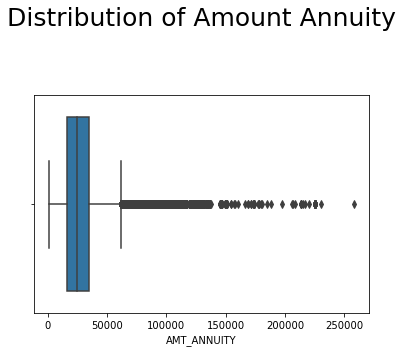

In [170]:
sns.boxplot(new_application.AMT_ANNUITY)
plt.title('Distribution of Amount Annuity')
plt.show()

In [80]:
new_application.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

 sns.boxplot(new_application.DAYS_BIRTH)
plt.title('Distribution of Age in the form of days')
plt.show()

# binning the variable

In [172]:
bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

new_application['AMT_CREDIT_RANGE']=pd.cut(new_application['AMT_CREDIT'],bins=bins,labels=slots)

In [173]:
bins = [0,7300,10950,14600,18250,21900,25500]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

new_application['AGE_RANGE']=pd.cut(new_application['DAYS_BIRTH'],bins,labels=slot)

In [209]:
bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']

new_application['AMT_INCOME_RANGE']=pd.cut(new_application['AMT_INCOME_TOTAL'],bins,labels=slot)

In [210]:
new_application.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120          NaN           1               1                0   
1              291          NaN           1               1                0   
2             2531         26.0           1               1                1   
3             2437          NaN           1               1                0   
4             3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                           0   
2                          0

# analysis

In [176]:
## checking the imbalance percentage

In [177]:
100*(new_application.TARGET.value_counts())/ (len(new_application))

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [211]:
#Dividing the dataset into two dataset of  target=1(people with payment difficulties) and target=0(all other)
target_1 = new_application[new_application['TARGET']==1]
target_0 = new_application[new_application['TARGET']==0]
target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   
5                    0.035792       16941           1588             4970.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
1              291          NaN           1               1                0   
2             2531         26.0           1               1                1   
3             2437          NaN           1               1                0   
4             3458          NaN           1               1                0   
5              477          NaN           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   
5                 1           1           0        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   

  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                          0                           0   
2                          0                           0   
3                     

In [212]:
target_1.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801        9461            637             3648.0   
26                    0.018029       18724           2628             6573.0   
40                    0.025164       17482           1262             1182.0   
42                    0.007305       13384           3597               45.0   
81                    0.028663       24794         365243             5391.0   

    DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0              2120          NaN           1               1                0   
26             1827          NaN           1               1                0   
40             1029          NaN           1               1                0   
42             4409          NaN           1               1                1   
81             4199          NaN           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                  1           1           0        Laborers              1.0   
26                 1           0           0   Cooking staff              1.0   
40                 1           0           0        Laborers              2.0   
42                 1           1           0     Sales staff              2.0   
81                 1           0           0             NaN              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
26 

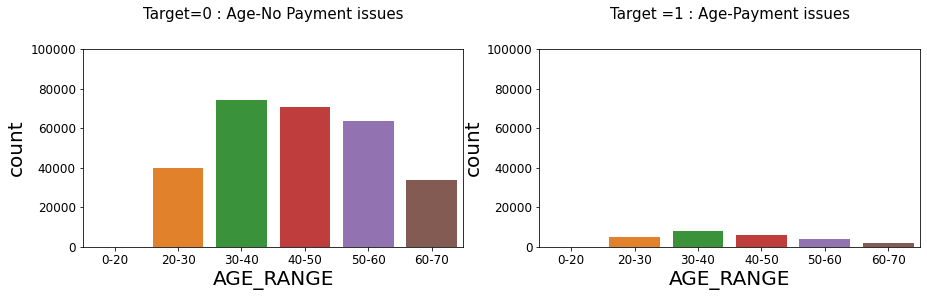

In [213]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Target=0 : Age-No Payment issues')
sns.countplot(target_0['AGE_RANGE'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Age-Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['AGE_RANGE'])
plt.show()

age group of 40 to 60 range they paid timly

In [214]:
# credit amount range

In [215]:
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Credit amount of loan - No payment issues')
sns.countplot(target_0['AMT_CREDIT_RANGE'],palette='muted')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(target_1['AMT_CREDIT_RANGE'], palette='muted')
plt.show()

In [216]:
### analysis for categorical value

In [217]:
# *** occupational type

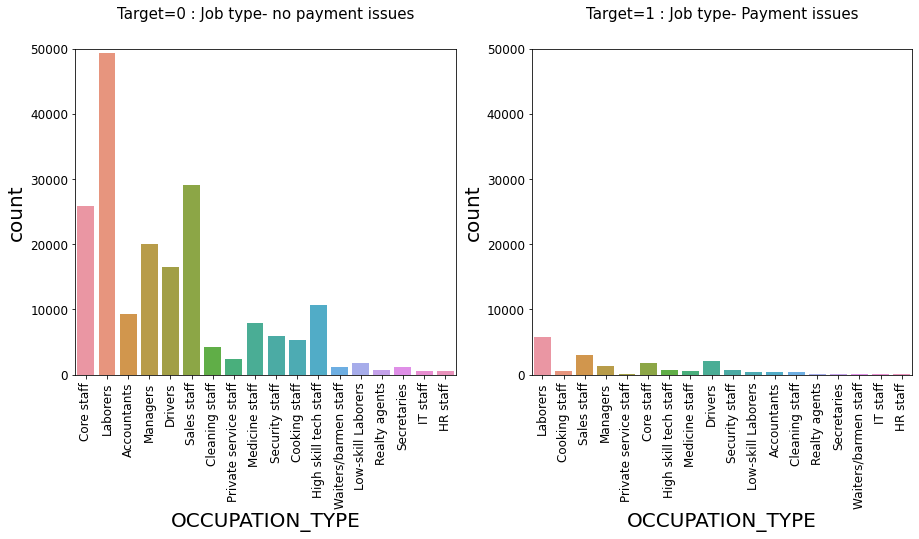

In [218]:
plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)
#plt.subplots_adjust(wspace=0.5)


sns.countplot(target_0['OCCUPATION_TYPE'])
plt.title('Target=0 : Job type- no payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['OCCUPATION_TYPE'])
plt.title('Target=1 : Job type- Payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.show()

laborers make timely payment as compare to other.

In [219]:
### name income type

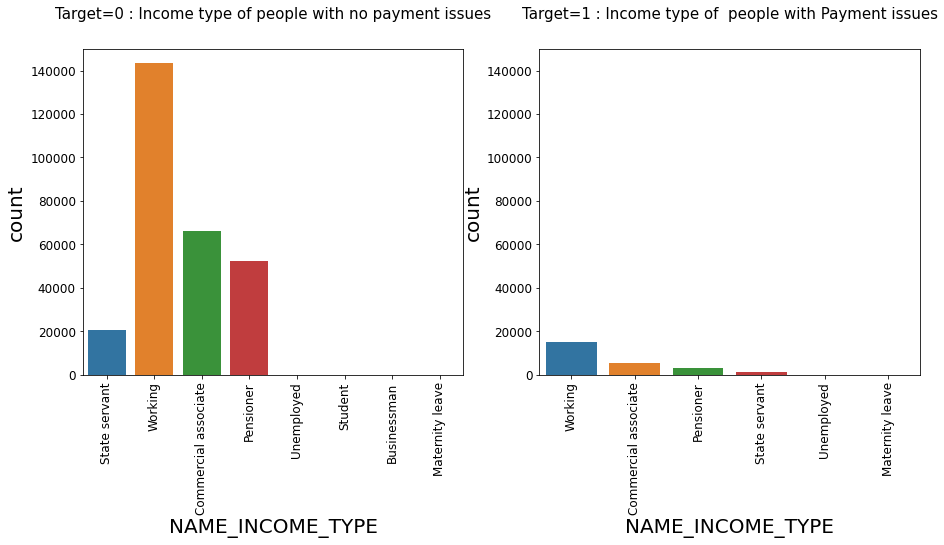

In [220]:
plt.figure(figsize = (15,6))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlepad'] = 30
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.subplot(1, 2, 1)
#plt.title()
sns.countplot(target_0['NAME_INCOME_TYPE'].dropna())
plt.title('Target=0 : Income type of people with no payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)

# subplot 2
plt.subplot(1, 2, 2)

sns.countplot(target_1['NAME_INCOME_TYPE'].dropna())
plt.title('Target=1 : Income type of  people with Payment issues')
plt.ylim(0,150000)
plt.xticks(rotation = 90)
plt.show()

# analyse categorical variabke with respect to target.


In [222]:
target = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
list(enumerate(target))

[(0, 'CODE_GENDER'),
 (1, 'NAME_INCOME_TYPE'),
 (2, 'NAME_EDUCATION_TYPE'),
 (3, 'NAME_FAMILY_STATUS'),
 (4, 'NAME_HOUSING_TYPE'),
 (5, 'OCCUPATION_TYPE')]

In [223]:
target = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(target):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = new_application)
    plt.xticks(rotation = 45)
    


female pay timely
working customer also pay on time
labour also pay timely


# correlation

In [224]:
## for numerical colomn

In [225]:
corr=target_0.corr()
corr

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000     NaN     -0.000716   
TARGET                               NaN     NaN           NaN   
CNT_CHILDREN                   -0.000716     NaN      1.000000   
AMT_INCOME_TOTAL                0.001739     NaN      0.027397   
AMT_CREDIT                     -0.000342     NaN      0.003081   
AMT_ANNUITY                     0.000068     NaN      0.020905   
AMT_GOODS_PRICE                -0.000205     NaN     -0.000525   
REGION_POPULATION_RELATIVE      0.000360     NaN     -0.024363   
DAYS_BIRTH                      0.001346     NaN     -0.336966   
DAYS_EMPLOYED                   0.001744     NaN     -0.245174   
DAYS_REGISTRATION               0.001475     NaN     -0.185792   
DAYS_ID_PUBLISH                 0.000077     NaN      0.028751   
OWN_CAR_AGE                     0.003019     NaN      0.008381   
FLAG_MOBIL                      0.002925     NaN      0.001080   
FLAG_EMP_PHONE                 -0.001717     NaN      0.244274   
FLAG_WORK_PHONE                -0.000854     NaN      0.055453   
FLAG_CONT_MOBILE                0.003319     NaN     -0.001201   
FLAG_PHONE                      0.001408     NaN     -0.029929   
FLAG_EMAIL                      0.000229     NaN      0.023460   
CNT_FAM_MEMBERS                -0.002790     NaN      0.878571   
REGION_RATING_CLIENT           -0.000519     NaN      0.022842   
REGION_RATING_CLIENT_W_CITY    -0.000739     NaN      0.021866   
HOUR_APPR_PROCESS_START        -0.000115     NaN     -0.005244   
REG_REGION_NOT_WORK_REGION      0.000836     NaN      0.010857   
EXT_SOURCE_1                    0.000529     NaN     -0.142540   
EXT_SOURCE_2                    0.001589     NaN     -0.015455   
EXT_SOURCE_3                    0.000309     NaN     -0.041729   
APARTMENTS_AVG                  0.001324     NaN     -0.012354   
BASEMENTAREA_AVG               -0.002078     NaN     -0.008087   
YEARS_BEGINEXPLUATATION_AVG     0.001202     NaN      0.007298   
YEARS_BUILD_AVG                 0.005692     NaN      0.030897   
COMMONAREA_AVG                 -0.000629     NaN      0.001296   
ELEVATORS_AVG                   0.003999     NaN     -0.005960   
ENTRANCES_AVG                  -0.001974     NaN     -0.008049   
FLOORSMAX_AVG                   0.004096     NaN     -0.008307   
FLOORSMIN_AVG                   0.001317     NaN     -0.007308   
LANDAREA_AVG                    0.002822     NaN     -0.003903   
LIVINGAPARTMENTS_AVG            0.003524     NaN     -0.007534   
LIVINGAREA_AVG                  0.001894     NaN     -0.009157   
NONLIVINGAPARTMENTS_AVG        -0.001276     NaN      0.005628   
NONLIVINGAREA_AVG               0.003658     NaN      0.000882   
APARTMENTS_MODE                 0.001666     NaN     -0.011227   
BASEMENTAREA_MODE              -0.001394     NaN     -0.008572   
YEARS_BEGINEXPLUATATION_MODE    0.001442     NaN      0.006545   
YEARS_BUILD_MODE                0.004952     NaN      0.030247   
COMMONAREA_MODE                -0.000110     NaN      0.001450   
ELEVATORS_MODE                  0.004206     NaN     -0.005287   
ENTRANCES_MODE                 -0.001934     NaN     -0.006556   
FLOORSMAX_MODE                  0.003747     NaN     -0.008199   
FLOORSMIN_MODE                  0.000489     NaN     -0.006686   
LANDAREA_MODE                   0.002829     NaN     -0.003240   
LIVINGAPARTMENTS_MODE           0.004021     NaN     -0.006677   
LIVINGAREA_MODE                 0.002411     NaN     -0.008644   
NONLIVINGAPARTMENTS_MODE       -0.000464     NaN      0.005695   
NONLIVINGAREA_MODE              0.002419     NaN      0.001119   
APARTMENTS_MEDI                 0.001689     NaN     -0.012149   
BASEMENTAREA_MEDI              -0.001609     NaN     -0.008479   
YEARS_BEGINEXPLUATATION_MEDI    0.000952     NaN      0.006783   
YEARS_BUILD_MEDI                0.005617     NaN      0.030887   
COMMONAREA_MEDI                -0.000245     NaN      0.001837   
ELEV

In [226]:
corr=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                           NaN     NaN     -0.000716   
TARGET                               NaN     NaN           NaN   
CNT_CHILDREN                         NaN     NaN           NaN   
AMT_INCOME_TOTAL                     NaN     NaN           NaN   
AMT_CREDIT                           NaN     NaN           NaN   
AMT_ANNUITY                          NaN     NaN           NaN   
AMT_GOODS_PRICE                      NaN     NaN           NaN   
REGION_POPULATION_RELATIVE           NaN     NaN           NaN   
DAYS_BIRTH                           NaN     NaN           NaN   
DAYS_EMPLOYED                        NaN     NaN           NaN   
DAYS_REGISTRATION                    NaN     NaN           NaN   
DAYS_ID_PUBLISH                      NaN     NaN           NaN   
OWN_CAR_AGE                          NaN     NaN           NaN   
FLAG_MOBIL                           NaN     NaN           NaN   
FLAG_EMP_PHONE                       NaN     NaN           NaN   
FLAG_WORK_PHONE                      NaN     NaN           NaN   
FLAG_CONT_MOBILE                     NaN     NaN           NaN   
FLAG_PHONE                           NaN     NaN           NaN   
FLAG_EMAIL                           NaN     NaN           NaN   
CNT_FAM_MEMBERS                      NaN     NaN           NaN   
REGION_RATING_CLIENT                 NaN     NaN           NaN   
REGION_RATING_CLIENT_W_CITY          NaN     NaN           NaN   
HOUR_APPR_PROCESS_START              NaN     NaN           NaN   
REG_REGION_NOT_WORK_REGION           NaN     NaN           NaN   
EXT_SOURCE_1                         NaN     NaN           NaN   
EXT_SOURCE_2                         NaN     NaN           NaN   
EXT_SOURCE_3                         NaN     NaN           NaN   
APARTMENTS_AVG                       NaN     NaN           NaN   
BASEMENTAREA_AVG                     NaN     NaN           NaN   
YEARS_BEGINEXPLUATATION_AVG          NaN     NaN           NaN   
YEARS_BUILD_AVG                      NaN     NaN           NaN   
COMMONAREA_AVG                       NaN     NaN           NaN   
ELEVATORS_AVG                        NaN     NaN           NaN   
ENTRANCES_AVG                        NaN     NaN           NaN   
FLOORSMAX_AVG                        NaN     NaN           NaN   
FLOORSMIN_AVG                        NaN     NaN           NaN   
LANDAREA_AVG                         NaN     NaN           NaN   
LIVINGAPARTMENTS_AVG                 NaN     NaN           NaN   
LIVINGAREA_AVG                       NaN     NaN           NaN   
NONLIVINGAPARTMENTS_AVG              NaN     NaN           NaN   
NONLIVINGAREA_AVG                    NaN     NaN           NaN   
APARTMENTS_MODE                      NaN     NaN           NaN   
BASEMENTAREA_MODE                    NaN     NaN           NaN   
YEARS_BEGINEXPLUATATION_MODE         NaN     NaN           NaN   
YEARS_BUILD_MODE                     NaN     NaN           NaN   
COMMONAREA_MODE                      NaN     NaN           NaN   
ELEVATORS_MODE                       NaN     NaN           NaN   
ENTRANCES_MODE                       NaN     NaN           NaN   
FLOORSMAX_MODE                       NaN     NaN           NaN   
FLOORSMIN_MODE                       NaN     NaN           NaN   
LANDAREA_MODE                        NaN     NaN           NaN   
LIVINGAPARTMENTS_MODE                NaN     NaN           NaN   
LIVINGAREA_MODE                      NaN     NaN           NaN   
NONLIVINGAPARTMENTS_MODE             NaN     NaN           NaN   
NONLIVINGAREA_MODE                   NaN     NaN           NaN   
APARTMENTS_MEDI                      NaN     NaN           NaN   
BASEMENTAREA_MEDI                    NaN     NaN           NaN   
YEARS_BEGINEXPLUATATION_MEDI         NaN     NaN           NaN   
YEARS_BUILD_MEDI                     NaN     NaN           NaN   
COMMONAREA_MEDI                      NaN     NaN           NaN   
ELEV

In [227]:
#convert it to dataframe
corrdf = corr.unstack().reset_index()
corrdf.head()

level_0           level_1   0
0  SK_ID_CURR        SK_ID_CURR NaN
1  SK_ID_CURR            TARGET NaN
2  SK_ID_CURR      CNT_CHILDREN NaN
3  SK_ID_CURR  AMT_INCOME_TOTAL NaN
4  SK_ID_CURR        AMT_CREDIT NaN

In [228]:
#Changing the names of solumns
corrdf.columns=['VAR1','VAR2','Correlation']
corrdf.head()

VAR1              VAR2  Correlation
0  SK_ID_CURR        SK_ID_CURR          NaN
1  SK_ID_CURR            TARGET          NaN
2  SK_ID_CURR      CNT_CHILDREN          NaN
3  SK_ID_CURR  AMT_INCOME_TOTAL          NaN
4  SK_ID_CURR        AMT_CREDIT          NaN

In [229]:
#Drop the columns having the missing data
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf.head()

VAR1          VAR2  Correlation
202      CNT_CHILDREN    SK_ID_CURR    -0.000716
303  AMT_INCOME_TOTAL    SK_ID_CURR     0.001739
305  AMT_INCOME_TOTAL  CNT_CHILDREN     0.027397
404        AMT_CREDIT    SK_ID_CURR    -0.000342
406        AMT_CREDIT  CNT_CHILDREN     0.003081

In [230]:
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf.head()

VAR1          VAR2  Correlation
202      CNT_CHILDREN    SK_ID_CURR        -0.00
303  AMT_INCOME_TOTAL    SK_ID_CURR         0.00
305  AMT_INCOME_TOTAL  CNT_CHILDREN         0.03
404        AMT_CREDIT    SK_ID_CURR        -0.00
406        AMT_CREDIT  CNT_CHILDREN         0.00

In [231]:
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.head()

VAR1          VAR2  Correlation
202      CNT_CHILDREN    SK_ID_CURR         0.00
303  AMT_INCOME_TOTAL    SK_ID_CURR         0.00
305  AMT_INCOME_TOTAL  CNT_CHILDREN         0.03
404        AMT_CREDIT    SK_ID_CURR         0.00
406        AMT_CREDIT  CNT_CHILDREN         0.00

In [232]:
#Sorting the correlation values
corrdf.sort_values(by = 'Correlation', ascending = False)


VAR1                          VAR2  Correlation
5582                APARTMENTS_MEDI                APARTMENTS_AVG         1.00
6194                 ENTRANCES_MEDI                 ENTRANCES_AVG         1.00
7342       OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE         1.00
6296                 FLOORSMAX_MEDI                 FLOORSMAX_AVG         1.00
6704                LIVINGAREA_MEDI                LIVINGAREA_AVG         1.00
5990                COMMONAREA_MEDI                COMMONAREA_AVG         1.00
6092                 ELEVATORS_MEDI                 ELEVATORS_AVG         1.00
5888               YEARS_BUILD_MEDI               YEARS_BUILD_AVG         1.00
1423                 FLAG_EMP_PHONE                 DAYS_EMPLOYED         1.00
6398                 FLOORSMIN_MEDI                 FLOORSMIN_AVG         1.00
4882                 FLOORSMAX_MODE                 FLOORSMAX_AVG         0.99
5786   YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG         0.99
6310                 FLOORSMAX_MEDI                FLOORSMAX_MODE         0.99
6806       NONLIVINGAPARTMENTS_MEDI       NONLIVINGAPARTMENTS_AVG         0.99
4474               YEARS_BUILD_MODE               YEARS_BUILD_AVG         0.99
5902               YEARS_BUILD_MEDI              YEARS_BUILD_MODE         0.99
610                 AMT_GOODS_PRICE                    AMT_CREDIT         0.99
6500                  LANDAREA_MEDI                  LANDAREA_AVG         0.99
6602          LIVINGAPARTMENTS_MEDI          LIVINGAPARTMENTS_AVG         0.99
5684              BASEMENTAREA_MEDI              BASEMENTAREA_AVG         0.99
4984                 FLOORSMIN_MODE                 FLOORSMIN_AVG         0.99
6908             NONLIVINGAREA_MEDI             NONLIVINGAREA_AVG         0.99
6412                 FLOORSMIN_MEDI                FLOORSMIN_MODE         0.99
6616          LIVINGAPARTMENTS_MEDI         LIVINGAPARTMENTS_MODE         0.98
5698              BASEMENTAREA_MEDI             BASEMENTAREA_MODE         0.98
4780                 ENTRANCES_MODE                 ENTRANCES_AVG         0.98
5596                APARTMENTS_MEDI               APARTMENTS_MODE         0.98
6208                 ENTRANCES_MEDI                ENTRANCES_MODE         0.98
6514                  LANDAREA_MEDI                 LANDAREA_MODE         0.98
4576                COMMONAREA_MODE                COMMONAREA_AVG         0.98
6106                 ELEVATORS_MEDI                ELEVATORS_MODE         0.98
6820       NONLIVINGAPARTMENTS_MEDI      NONLIVINGAPARTMENTS_MODE         0.98
4678                 ELEVATORS_MODE                 ELEVATORS_AVG         0.98
6922             NONLIVINGAREA_MEDI            NONLIVINGAREA_MODE         0.98
6004                COMMONAREA_MEDI               COMMONAREA_MODE         0.98
5290                LIVINGAREA_MODE                LIVINGAREA_AVG         0.97
5188          LIVINGAPARTMENTS_MODE          LIVINGAPARTMENTS_AVG         0.97
4372   YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG         0.97
4270              BASEMENTAREA_MODE              BASEMENTAREA_AVG         0.97
5494             NONLIVINGAREA_MODE             NONLIVINGAREA_AVG         0.97
5086                  LANDAREA_MODE                  LANDAREA_AVG         0.97
4168                APARTMENTS_MODE                APARTMENTS_AVG         0.97
5392       NONLIVINGAPARTMENTS_MODE       NONLIVINGAPARTMENTS_AVG         0.97
6718                LIVINGAREA_MEDI               LIVINGAREA_MODE         0.97
5800   YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE         0.96
2141    REGION_RATING_CLIENT_W_CITY          REGION_RATING_CLIENT         0.95
6592          LIVINGAPARTMENTS_MEDI                APARTMENTS_AVG         0.94
6620          LIVINGAPARTMENTS_MEDI               APARTMENTS_MEDI         0.94
3764           LIVINGAPARTMENTS_AVG                APARTMENTS_AVG         0.94
5192          LIVINGAPARTMENTS_MODE               APARTMENTS_MODE         0.94
55

In [233]:
#For target_1 dataframe we perform the same operations to find correlation
corr = target_1.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute valucorrdf['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)


VAR1                      VAR2  Correlation
6398            FLOORSMIN_MEDI             FLOORSMIN_AVG          1.0
6194            ENTRANCES_MEDI             ENTRANCES_AVG          1.0
6704           LIVINGAREA_MEDI            LIVINGAREA_AVG          1.0
6296            FLOORSMAX_MEDI             FLOORSMAX_AVG          1.0
6806  NONLIVINGAPARTMENTS_MEDI   NONLIVINGAPARTMENTS_AVG          1.0
6602     LIVINGAPARTMENTS_MEDI      LIVINGAPARTMENTS_AVG          1.0
6820  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_MODE          1.0
5990           COMMONAREA_MEDI            COMMONAREA_AVG          1.0
7342  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE          1.0
5684         BASEMENTAREA_MEDI          BASEMENTAREA_AVG          1.0

#bivrate analysis for target 0 and 1

In [234]:
# Income vs Credit, Goods price vs Credit

In [235]:
#Scatter plot for numeric columns

plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(target_0.AMT_INCOME_TOTAL,target_0.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.subplot(2,2,2)
sns.scatterplot(target_1.AMT_INCOME_TOTAL,target_1.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')


plt.subplot(2,2,3)
sns.scatterplot(target_0.AMT_GOODS_PRICE,target_0.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(target_1.AMT_GOODS_PRICE,target_1.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)
plt.show()

In [236]:
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('Target_0:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_0, palette='rocket')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target_1:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=target_1,palette='rocket')
plt.show()


In [ ]:
#credit amount vs aducation status

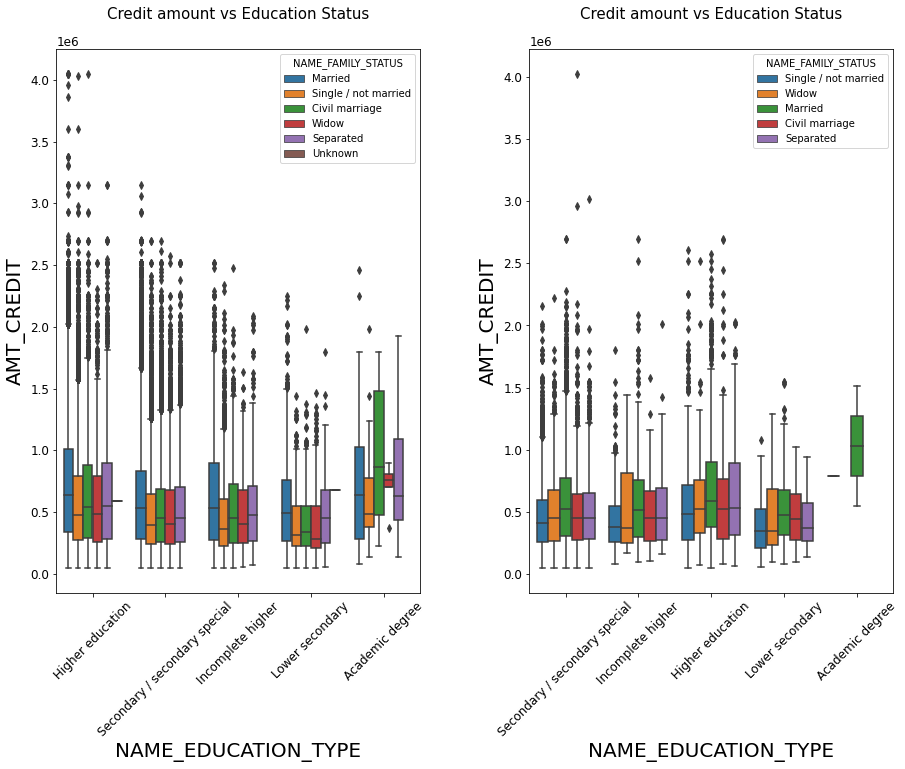

In [237]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)

plt.subplot(122)
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)
plt.show()


The people with secondary education are less likely to make payments on time.
more no of outlier is present on higher education.

In [ ]:
#income vs education status

In [238]:
plt.figure(figsize=(18,15))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status(Target 0)')
plt.xticks(rotation=45)



plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status (Target 1)')
plt.xticks(rotation=45)
plt.show()

# reading the previous application

In [244]:
df1 =pd.read_csv('previous_application.csv')
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [245]:
# Cleaning the missing data

# listing the null values columns having more than 50%

emptycol1=df1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.5*len(emptycol1))]
len(emptycol1)

15

In [246]:
#removing these 15 column


emptycol1 = list(emptycol1[emptycol1.values>=0.5].index)
df1.drop(labels=emptycol1,axis=1,inplace=True)

df1.shape

(1670214, 22)

In [247]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(69635, 22)

In [249]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=new_application,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [250]:
#after merging rename the column
new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


In [251]:
#drop the column
new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [ ]:
### univeriate analysis

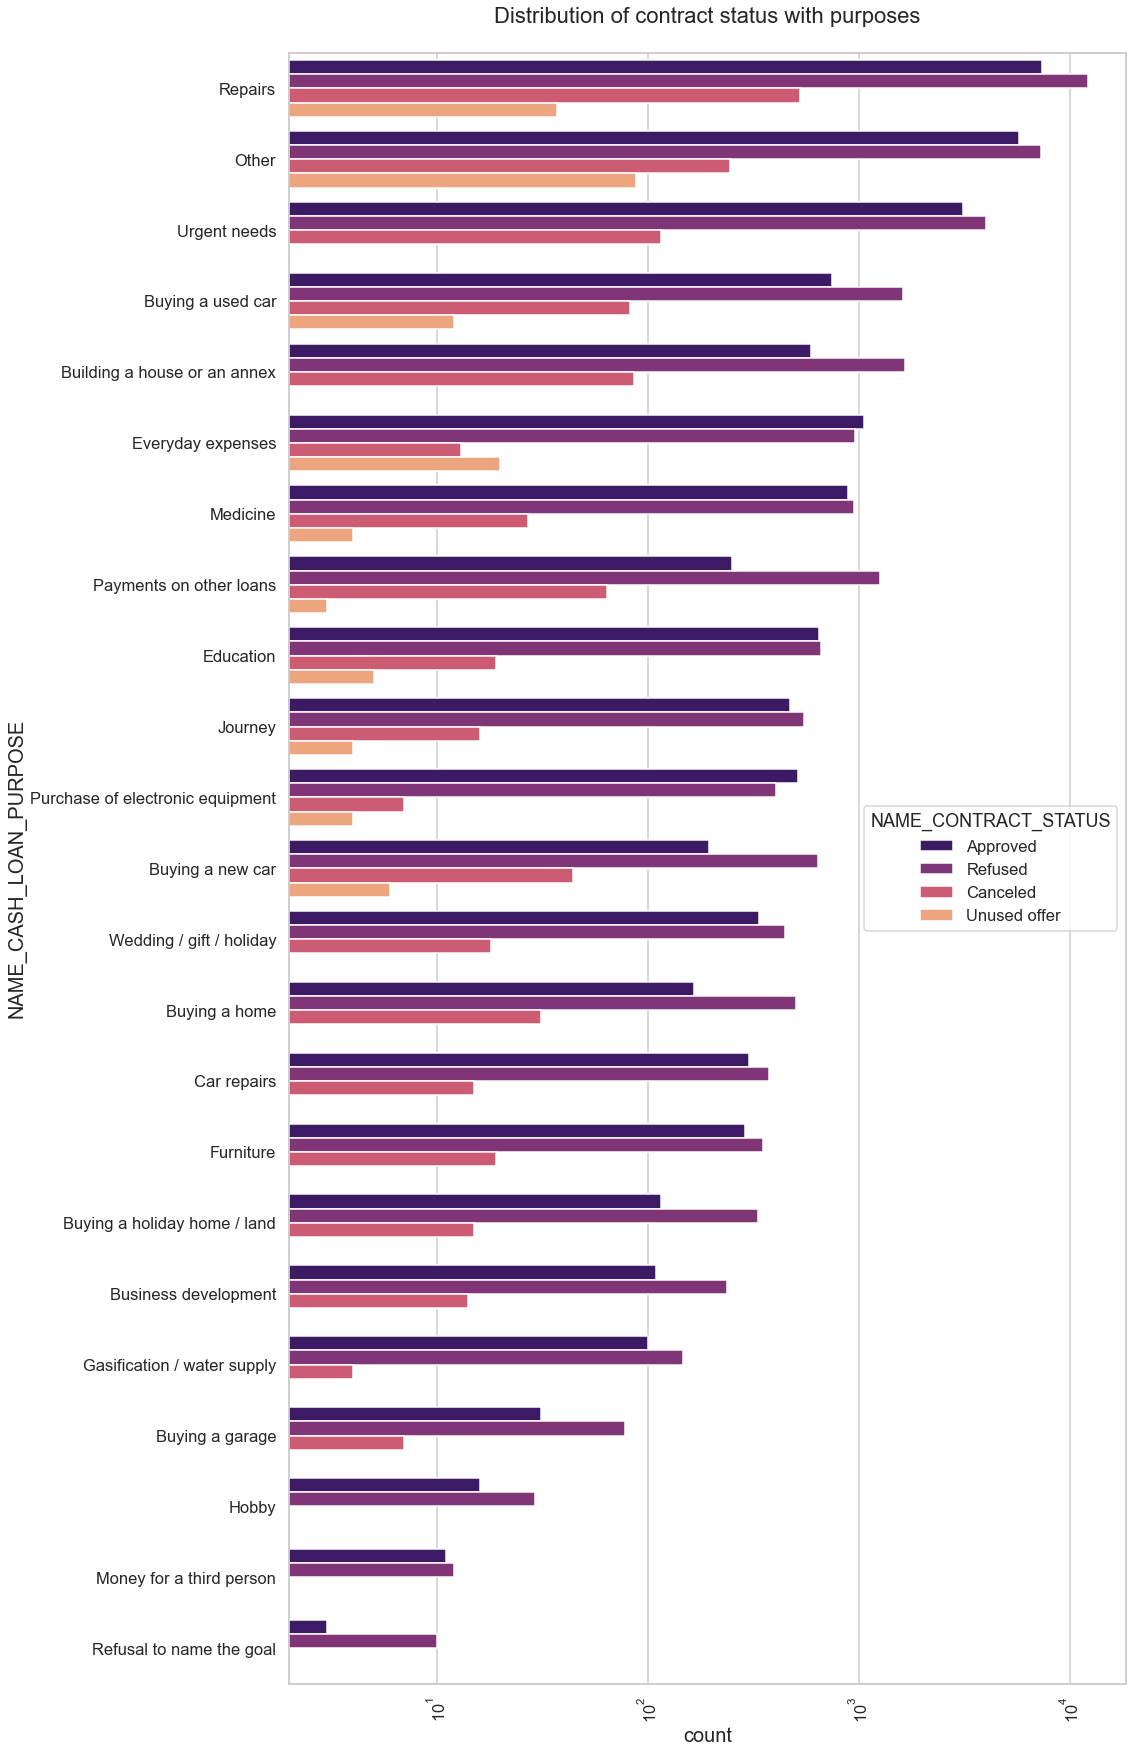

In [252]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

Equal no of rejection is there for education type loan

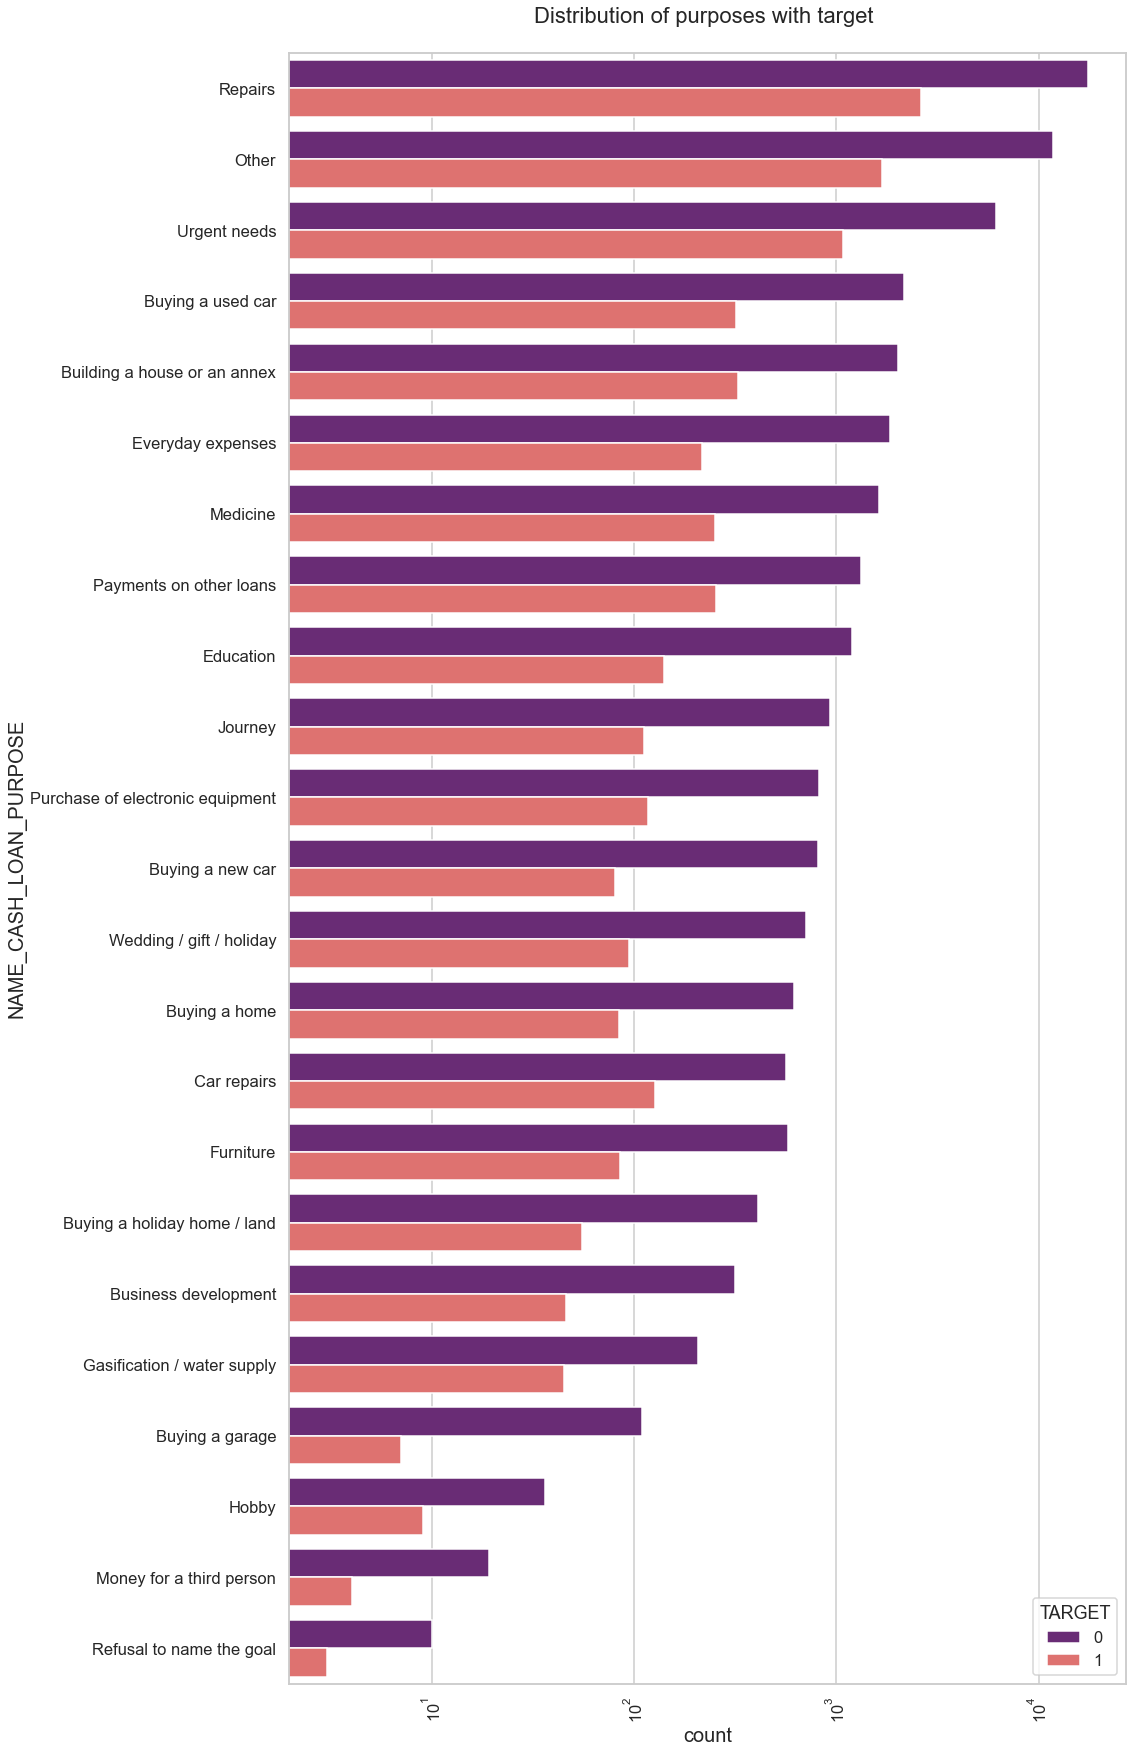

In [253]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 


Loan purposes with 'Repairs' are facing more difficulites in payment on time.

In [ ]:
## bivariate analysis 

In [254]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

In [ ]:
## previous amount vs housing

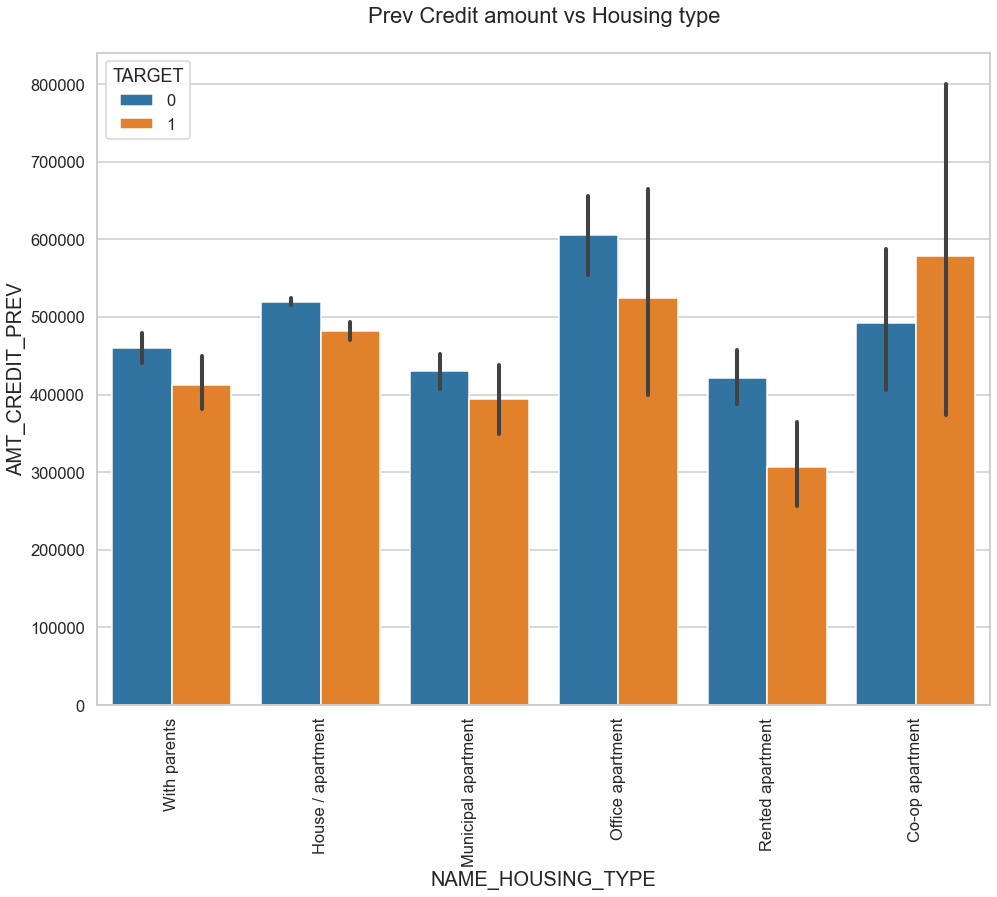

In [255]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

.Those have housing type of loan there sucess rate is high.
. Bank should have to focus on student, buisnessmen,pensionar.
. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.